In [53]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [54]:
plt.rcParams['figure.figsize'] = [6, 8]

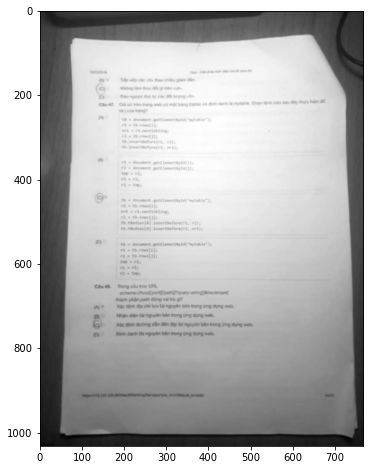

In [55]:
# 1. Doc anh, chuyen thanh anh xam
image = cv2.imread("exam5.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(blurred, cmap='gray')

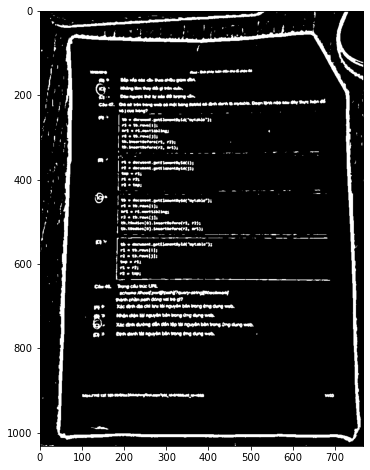

In [56]:
# 2. Threshold de
thresh = cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,            cv2.THRESH_BINARY_INV,31,3)
plt.imshow(thresh, cmap='gray')

In [57]:
# 3. Tim khung ben ngoai de tach van ban khoi nen
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=lambda x: cv2.contourArea(x),reverse=True)
approx = cv2.approxPolyDP(contours[1], 0.01 * cv2.arcLength(contours[1], True), True)
rect = cv2.minAreaRect(contours[1])
box = cv2.boxPoints(rect)

In [58]:
import math

def order_points(pts):

    rect = np.zeros((4, 2), dtype="float32")
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    # return the ordered coordinates
    return rect

def four_point_transform(image, pts):


    rect = order_points(pts)
    (tl, tr, br, bl) = rect

    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))

    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))

    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype = "float32")
    # compute the perspective transform matrix and then apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
    # return the warped image
    return warped

def find_corner_by_rotated_rect(box,approx):
    corner = []
    for p_box in box:
        min_dist = 999999999
        min_p = None
        for p in approx:
            dist = distance(p_box, p[0])
            if dist < min_dist:
                min_dist = dist
                min_p = p[0]
        corner.append(min_p)

    corner = np.array(corner)
    return corner
def distance(p1,p2):
    my_dist = math.sqrt(((p1[0] - p2[0]) ** 2) + ((p1[1] - p2[1]) ** 2))
    return  my_dist

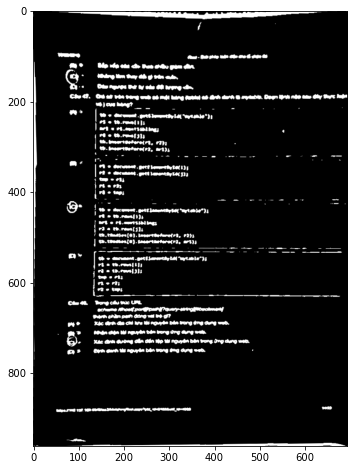

In [59]:
# 4. Thuc hien transform de xoay van ban
corner = find_corner_by_rotated_rect(box,approx)
image = four_point_transform(image,corner)
wrap = four_point_transform(thresh,corner)
plt.imshow(wrap, cmap='gray')